# Homework #9: Computational Questions

All computations should be done in this notebook using the R kernel. This is your first opportunity to get familiar with R outside of class, so please take your time on the problems that require it. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. Follow all instructions very closely or points will be deducted.

#### You will be required to submit this notebook, fully compiled with your solutions, as an Jupyter Notebook and as an HTML file to Canvas by 5pm on Friday, April 26.

#### Read and sign the Honor Code Pledge below:

**Honor Code Pledge: _On my honor, as a University of Colorado Boulder student, I have neither given nor received unauthorized assistance on this work._**

### _Juan Vargas-Murillo_

## Problem 1

#### (a) Generate 10,000 samples of size $n_1 = 20$ from $X \sim N(8,2)$ and 10,000 samples of size $n_2 = 20$ from $Y\sim N(6,2)$. Use ${\tt set.seed(89)}$ so that the answers are reproducible. Assume $X$ and $Y$ are independent and $\alpha = 0.05$. Create a density (not frequency!) histogram of the 10,000 values of $s_x^2\big/s_y^2$.

In [17]:
num_experiments <- 10000
num_samples <- 20
Xmu <- 8
Xsigma <- sqrt(2)
Ymu <- 6
Ysigma <- sqrt(2)

set.seed(89)

In [18]:
Xmtrx <- matrix(NA, nrow=num_experiments, ncol=num_samples)

for (n in 1:num_experiments)
  Xmtrx[n,] <- rnorm(num_samples, mean = Xmu, sd =Xsigma)

In [19]:
Ymtrx <- matrix(NA, nrow=num_experiments, ncol=num_samples)

for (n in 1:num_experiments)
  Ymtrx[n,] <- rnorm(num_samples, mean = Ymu, sd = Ysigma)

In [20]:
varx<- apply(Xmtrx, 1, var)
vary<- apply(Ymtrx, 1, var)


In [21]:
varratios <- varx / vary

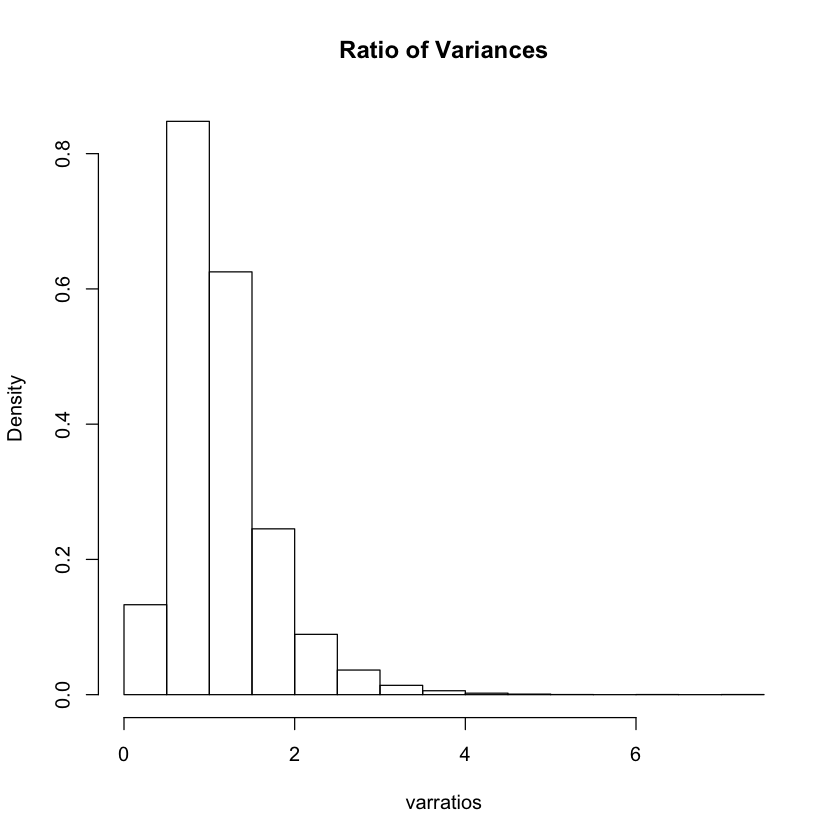

In [22]:
hist(varratios, freq=FALSE, main = "Ratio of Variances")

#### (b)  Superimpose the density curve of a F distribution with $n=19$ and $m=19$ degrees of freedom on the density histogram of $s_x^2\big/s_y^2$ What type of distribution does the statistic $s_x^2\big/s_y^2$ follow?

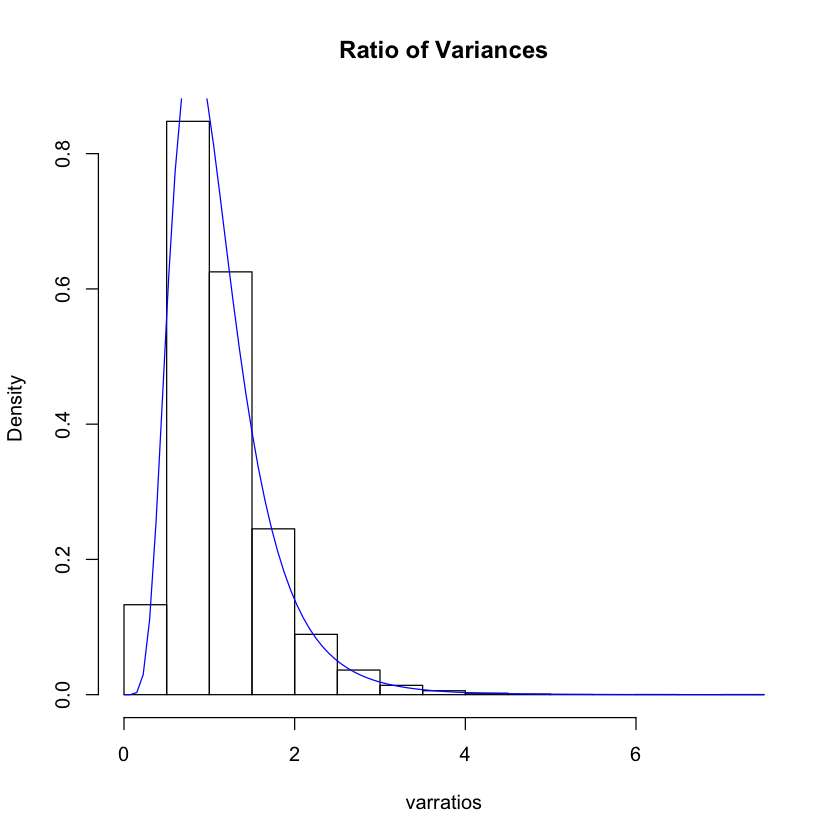

In [23]:
x <- seq(0,6,0.01)
hist(varratios, freq=FALSE, main = "Ratio of Variances")
curve( df(x, df1 = 19, df2 = 19), col='blue', add = TRUE )



**STUDENT ANSWER:** The ratio of variances for the data follows a F-distribution.

![meme](https://i.pinimg.com/236x/ea/74/2d/ea742de6dc014987b153a8accae41342--ap-statistics-teacher-stuff.jpg)

![meme](https://s-media-cache-ak0.pinimg.com/736x/c7/54/2a/c7542abc123d8e550baef9d557256f1d.jpg)

## Problem 2

The manager of a web company is interested in predicting the number of megabytes downloaded by clients (*i.e.* the variable ${\tt megasd}$) according to the number of minutes they are connected (*i.e.* the variable ${\tt mconnected}$). The manager randomly selects clients and records the data (*i.e.* the (${\tt megasd, mconnected}$) pairs) and stores them in the file ${\tt url-SP19-R.csv}$ (or ${\tt url-SP19-TAB.txt}$).

#### (a) Load the data from ${\tt url-SP19-R.csv}$ (or ${\tt url-SP19-TAB.txt}$).

In [24]:
URL <- read.csv('url-SP19-R.csv')
head(URL)

megasd,mconnected
54.39,4.74
126.70,12.45
160.30,15.58
38.52,4.21
49.81,4.82
160.24,15.16


#### (b) Create a scatterplot of the data with megabytes downloaded as a function of minutes connected. Characterize the relationship between ${\tt megasd}$ and ${\tt mconnected}$.

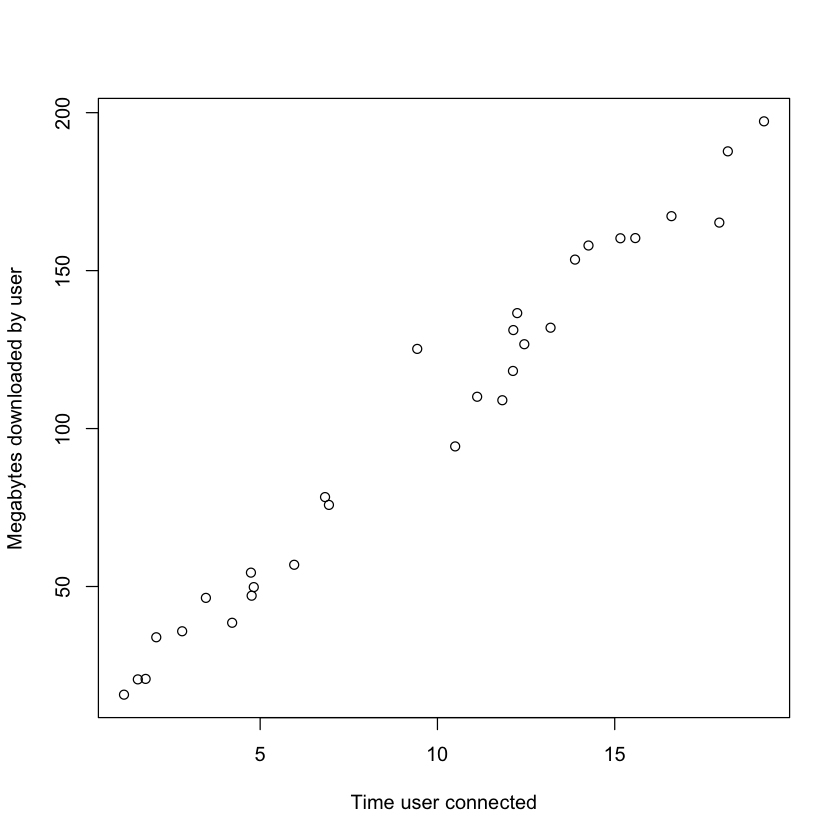

In [25]:
plot(URL$mconnected, URL$megasd, ylab = "Megabytes downloaded by user", xlab = "Time user connected")

**STUDENT ANSWER:** The relationship between the time the user is connected to the website and the amount of megabytes they download of content seems to be linearly positively correlated. The more time an user spends time on the website the more megabytes they download.

#### (c)  Fit a regression line to the data. Superimpose the resulting line on the plot created in part (b).


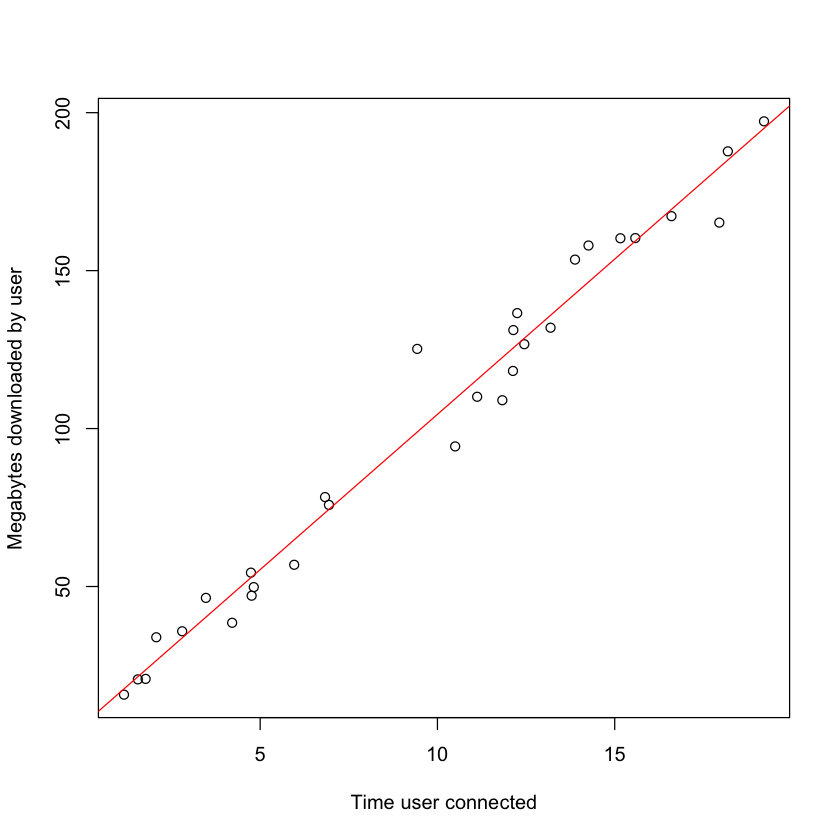

In [26]:
plot(URL$mconnected, URL$megasd, ylab = "Megabytes downloaded by user", xlab = "Time user connected")
# model <- lm(URL$megasd ~ URL$mconnected)
model <- lm(megasd ~ mconnected, data = URL)
abline(model, col='red')

#### (d) Display the summary of the linear model. What is the standard error of $\widehat{\beta}_1$? 

In [27]:
summary(model)


Call:
lm(formula = megasd ~ mconnected, data = URL)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.4601  -5.0653   0.0563   5.0002  26.3222 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.1890     3.2964   1.878   0.0709 .  
mconnected    9.8313     0.2988  32.897   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.992 on 28 degrees of freedom
Multiple R-squared:  0.9748,	Adjusted R-squared:  0.9739 
F-statistic:  1082 on 1 and 28 DF,  p-value: < 2.2e-16


**STUDENT ANSWER:** The standard error of $\hat{\beta}_{1}$ is 0.2988 

#### (e) How much variability in ${\tt megasd}$ can be explained by ${\tt mconnected}$?

`megasd` can explain quite a bit of the variability of `mconnected` because the the R-square value is pretty high, namely, 0.9748.

#### (f) Estimate the mean value of megabytes downloaded by clients spending 4, 8, and 12 minutes online and give a 95% confidence interval for those estimates. (Hint: See the [${\tt predict()}$](https://www.rdocumentation.org/packages/stats/versions/3.5.3/topics/predict.lm) command.) Give a brief interpretation of your results.

In [28]:
new_data <- data.frame(mconnected = c(4, 8, 12))
pred <- predict(model, newdata = new_data, interval =  "confidence", level = 0.95)
pred
# mean(pred)

,fit,lwr,upr
1,45.51402,40.72711,50.30094
2,84.83907,81.34237,88.33577
3,124.16412,120.48567,127.84258


**STUDENT ANSWER:** The mean values predicted are good predictions because if we look at the plot of the data, for the new times spent (4, 8, 12) on the website the values predicted are close to the regression line.

#### (g) Construct a 90% confidence interval for the slope of the regression line. (See [${\tt confint()}$](https://www.rdocumentation.org/packages/stats/versions/3.5.3/topics/confint) command.)

In [29]:
confint(model, "mconnected", level = 0.90)

,5 %,95 %
mconnected,9.322883,10.33964


![meme](https://i.pinimg.com/236x/15/d1/1e/15d11e8b2c4e0e4934a82e27b8437206--room-ideas-gag.jpg)